# Tensorflow Training
### produced through training from Zenva
This is a simple linear regression model that draws an average into to a scatterplot.

First thing's first. Let's make sure we have everything installed. We need Tensorflow, matplotlib, and numpy. These can be installed through the powershell terminal using the 'pip install' command.

In [ ]:
#pip install tensorflow
#pip install matplotlib
#This code is for Powershell, not python.

To check if Tensorflow is up to date, you can run the following code in the terminal:

In [ ]:
#pip install --upgrade tensorflow
#This code is for powershell, not python.

Now let's import all of the libraries we need:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Now let's set some variables and generate random points to be plotted.

In [2]:
m = 2
b = 0.5
x = np.linspace(0,4,100)
y = m*x+b+np.random.randn(*x.shape) +0.25

Let's plot this just to see how it lays out:

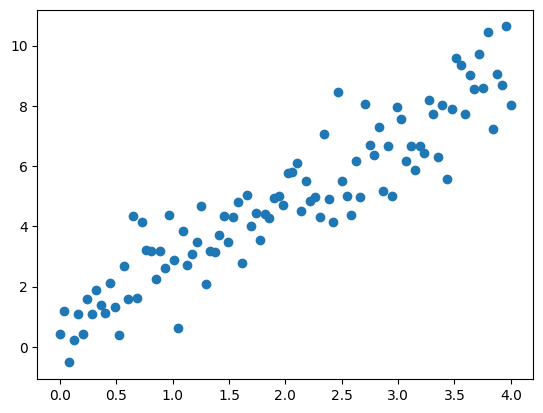

In [3]:
plt.scatter(x,y)

Now we will create a Model class:

In [4]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
    def __call__(self, x):
        return self.weight * x + self.bias

Create a definition to calculate the loss:

In [5]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))
    #this essentially takes the square root of the average

Now create a training function:

In [6]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

Now we can create a for loop that will run {epochs} number of times and print out the loss at each epoch. Lower loss means the model is more accurate.

In [7]:
model = Model()
epochs = 100
learning_rate = 0.15
for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Epoch: {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Epoch: 0, loss: 718.796630859375
Epoch: 1, loss: 510.6009521484375
Epoch: 2, loss: 362.9829406738281
Epoch: 3, loss: 258.2913513183594
Epoch: 4, loss: 184.02191162109375
Epoch: 5, loss: 131.31529235839844
Epoch: 6, loss: 93.8947525024414
Epoch: 7, loss: 67.31262969970703
Epoch: 8, loss: 48.4172477722168
Epoch: 9, loss: 34.97502517700195
Epoch: 10, loss: 25.402795791625977
Epoch: 11, loss: 18.578258514404297
Epoch: 12, loss: 13.705617904663086
Epoch: 13, loss: 10.220495223999023
Epoch: 14, loss: 7.722496509552002
Epoch: 15, loss: 5.927465915679932
Epoch: 16, loss: 4.6336517333984375
Epoch: 17, loss: 3.6977264881134033
Epoch: 18, loss: 3.017801523208618
Epoch: 19, loss: 2.521388530731201
Epoch: 20, loss: 2.1568603515625
Epoch: 21, loss: 1.8874070644378662
Epoch: 22, loss: 1.6867423057556152
Epoch: 23, loss: 1.536061406135559
Epoch: 24, loss: 1.4218829870224
Epoch: 25, loss: 1.3345167636871338
Epoch: 26, loss: 1.2669765949249268
Epoch: 27, loss: 1.214206337928772
Epoch: 28, loss: 1.172531

Here we plot out the weight and bias:

In [8]:
print(model.weight.numpy())
print(model.bias.numpy())

2.0581834
0.74373317


Finally we can generate the average on top of the original scatterplot.

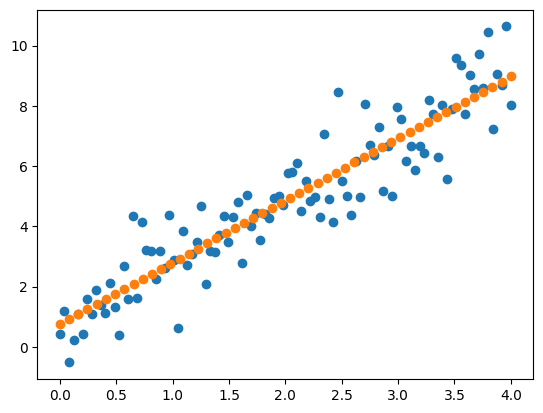

In [9]:
new_x = np.linspace(0,4,50)
new_y = model.weight.numpy()* new_x + model.bias.numpy()
plt.scatter(x,y)
plt.scatter(new_x,new_y)

# End!
### Thanks for checking this out.
Josh Winiarski